# Recurrent Neural Network

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_train = pd.read_csv('Google_Stock_Price_Train.csv')
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
train_set = data_train.iloc[:,1:2].values
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_scaled = sc.fit_transform(train_set)

### Creating a data structure with 60 timesteps and 1 output
it means that x_train will be the 60 days's data and y_train will be output of 60 days

In [14]:
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])

In [16]:
x_train[1:5]

[array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.02409033, 0.0159238 ,
        0.01078949, 0.00967334, 0.01642607, 0.02100231, 0.02280676,
        0.02273235, 0.02810849, 0.03212665, 0.0433812 , 0.04475779,
        0.04790163, 0.0440695 , 0.04648783, 0.04745517, 0.04873875,
        0.03936305, 0.04137213, 0.04034898, 0.04784582, 0.04325099,
        0.04356723, 0.04286033, 0.04602277, 0.05398467, 0.05738894,
        0.05714711, 0.05569611, 0.04421832, 0.04514845, 0.04605997,
        0.04412531, 0.03675869, 0.04486941, 0.05065481, 0.05214302,
        0.05612397, 0.05818885, 0.06540665, 0.06882953, 0.07243843,
        0.07993526, 0.07846566, 0.08034452, 0.08497656, 0.08627874]),
 array([0.09433366, 0.09156187, 0.07984225, 0.0643277 , 0.0585423 ,
        0.06568569, 0.06109085, 0.06639259, 0.0614257 , 0.07474514,
        0.02797827, 0.02379269, 0.02409033, 0.

In [17]:
y_train[1:5]

[0.08471612471166012,
 0.07454051640747084,
 0.07883771113922167,
 0.07238261775429711]

In [22]:
x_train, y_train = np.array(x_train),np.array(y_train)

In [23]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [24]:
y_train[1:5]

array([0.08471612, 0.07454052, 0.07883771, 0.07238262])

### Reshaping

In [25]:
x_train.shape[0]

1198

In [26]:
x_train.shape[1]

60

In [27]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [28]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [30]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [31]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape = (x_train.shape[1],1)))

C:\ProgramData\anaconda3\envs\pytorch\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [16]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [17]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [18]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [19]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 9s 23ms/step - loss: 0.0463
Epoch 2/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0046
Epoch 4/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0045
Epoch 5/100
38/38 [==============================] - 1s 32ms/step - loss: 0.0041
Epoch 6/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0043
Epoch 7/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0038
Epoch 9/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0038
Epoch 10/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0035
Epoch 12/100
38/38 [==============================] - 1s 32ms/step - loss: 0.0035
Epoch 13/100
38/38 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [32]:
data_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [33]:
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [34]:
real_price = data_test.iloc[:,1:2].values

In [35]:
real_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [36]:
data_total = pd.concat((data_train['Open'],data_test['Open']),axis=0)
inputs = data_total[len(data_total)-len(data_test)-60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [41]:
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [44]:
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test[0][0:20]

array([-0.52019776, -0.52019775, -0.52019776, -0.52019771, -0.52019772,
       -0.52019774, -0.52019774, -0.52019775, -0.5201977 , -0.52019763,
       -0.5201976 , -0.52019765, -0.52019759, -0.52019751, -0.52019758,
       -0.52019761, -0.52019757, -0.52019765, -0.52019773, -0.52019776])

In [28]:
x_test = np.array(x_test)
x_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [33]:
x_test.shape[0]

20

In [32]:
x_test.shape[1]

60

In [29]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [30]:
pridicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(pridicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

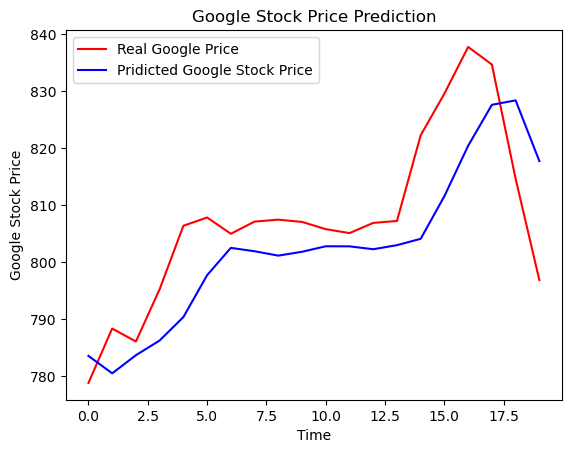

In [31]:
plt.plot(real_price,color='red',label='Real Google Price')
plt.plot(predicted_stock_price,color = 'blue',label='Pridicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()